# About the company
Bellabeat is a high-tech company that produces health related smart products. Since it was founded on 2013, it has grown rapidly, empowering women with knowledge about their health and lifestyles by collecting data on activity, sleep,and reproducitve health. Sršen, co-founder of th the company beleives that by analysing the available consumer data would reveal more oppurtunities for growth.

# 1. Ask Phase

## 1.1 Business task
Analyze smart device usage data to gain insight on how consumers use non-Bellabeat smart devices to spply these insights into Bellabeat's marketting strategy.
 
## 1.2 Stakeholders
* **Urška Sršen** - Bellabeat's co-founder and cheif creative officer
* **Sando Mur** - Bellabeat's co-founder and a Mathematician

# 2. Prepare phase

## 2.1 Dataset used
For this capstone project, we'll be using the FIbit Fitness Tracker data which was made publicly available on Kaggle by the user [Möbius](http:www.kaggle.com/arashnic)

## 2.2 Information about the dataset
This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.

## 2.3 Data organization
The dataset consists of 18 csv files. Most of the data are in a wide format and many of them can be ignored because they are merged into a bigger, more complete dataset or the sample size is rather limited.

## 2.4 Data limitation
* **Small sample size** The data collected is only of 30 users. This would most likely lead to a bias as the sample size is not large enough to make any meaningful analysis. On top of that, we are also not sure if the sample is representative of the whole population. 
* **Short data collection period** Only 2 months of data is a narrow time frame to provide any sigfnificant recomendation
* **Inadequate data** Gender, age, height are not included in the data. 

# 3. Process phase

## 3.1 Loading the required packages

Setting up the environment by installing and loading the required packages. The follwing packages are used in this analysis: tidyverse, lubridate, ggplot2, and dplyr.


In [1]:
install.packages("tidyverse")
install.packages("lubridate")
install.packages("ggplot2")
install.packages("dplyr")

library(tidyverse)
library(lubridate)
library(ggplot2)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘glue’, ‘cli’, ‘rlang’, ‘vctrs’


Warning message in install.packages("dplyr"):
“installation of package ‘glue’ had non-zero exit status”
Warning message in install.packages("dplyr"):
“installation of package ‘rlang’ had non-zero exit status”
Warning message in install.packages("dplyr"):
“installation of package ‘vctrs’ had non-zero exit status”
Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ string

## 3.2 Loading the data sets
For our analysis, we will focus on the daily informations as shorter timeframes usually doesn't exhibit relevant trends.

In [2]:
activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
intensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
steps <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

## 3.3 Analyzing the data sets
Here, we are simply previewing the tables, looking for inconsistencies and looking at the format of the tables.

In [3]:
head(activity)
head(calories)
head(intensities)
head(steps)
head(sleep)
head(weight)

summary(activity)
summary(calories)
summary(intensities)
summary(steps)
summary(sleep)
summary(weight)

str(activity)
str(calories)
str(intensities)
str(steps)
str(sleep)
str(weight)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,ActivityDay,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
,<dbl>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
2,1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
3,1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
4,1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
5,1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
6,1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


,Id,ActivityDay,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,13162
2,1503960366,4/13/2016,10735
3,1503960366,4/14/2016,10460
4,1503960366,4/15/2016,9762
5,1503960366,4/16/2016,12669
6,1503960366,4/17/2016,9705


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


       Id            ActivityDate         TotalSteps    TotalDistance   
 Min.   :1.504e+09   Length:940         Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Mode  :character   Median : 7406   Median : 5.245  
 Mean   :4.855e+09                      Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09                      3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09                      Max.   :36019   Max.   :28.030  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.9421           Max.   :21.920    
 ModeratelyActiveDistance LightActiveDistance Sedentary

       Id            ActivityDay           Calories   
 Min.   :1.504e+09   Length:940         Min.   :   0  
 1st Qu.:2.320e+09   Class :character   1st Qu.:1828  
 Median :4.445e+09   Mode  :character   Median :2134  
 Mean   :4.855e+09                      Mean   :2304  
 3rd Qu.:6.962e+09                      3rd Qu.:2793  
 Max.   :8.878e+09                      Max.   :4900  

       Id            ActivityDay        SedentaryMinutes LightlyActiveMinutes
 Min.   :1.504e+09   Length:940         Min.   :   0.0   Min.   :  0.0       
 1st Qu.:2.320e+09   Class :character   1st Qu.: 729.8   1st Qu.:127.0       
 Median :4.445e+09   Mode  :character   Median :1057.5   Median :199.0       
 Mean   :4.855e+09                      Mean   : 991.2   Mean   :192.8       
 3rd Qu.:6.962e+09                      3rd Qu.:1229.5   3rd Qu.:264.0       
 Max.   :8.878e+09                      Max.   :1440.0   Max.   :518.0       
 FairlyActiveMinutes VeryActiveMinutes SedentaryActiveDistance
 Min.   :  0.00      Min.   :  0.00    Min.   :0.000000       
 1st Qu.:  0.00      1st Qu.:  0.00    1st Qu.:0.000000       
 Median :  6.00      Median :  4.00    Median :0.000000       
 Mean   : 13.56      Mean   : 21.16    Mean   :0.001606       
 3rd Qu.: 19.00      3rd Qu.: 32.00    3rd Qu.:0.000000       
 Max.   :143.00      Max.   :210.00    Max.   :0.110000       
 LightActiveD

       Id            ActivityDay          StepTotal    
 Min.   :1.504e+09   Length:940         Min.   :    0  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790  
 Median :4.445e+09   Mode  :character   Median : 7406  
 Mean   :4.855e+09                      Mean   : 7638  
 3rd Qu.:6.962e+09                      3rd Qu.:10727  
 Max.   :8.878e+09                      Max.   :36019  

       Id              SleepDay         TotalSleepRecords TotalMinutesAsleep
 Min.   :1.504e+09   Length:413         Min.   :1.000     Min.   : 58.0     
 1st Qu.:3.977e+09   Class :character   1st Qu.:1.000     1st Qu.:361.0     
 Median :4.703e+09   Mode  :character   Median :1.000     Median :433.0     
 Mean   :5.001e+09                      Mean   :1.119     Mean   :419.5     
 3rd Qu.:6.962e+09                      3rd Qu.:1.000     3rd Qu.:490.0     
 Max.   :8.792e+09                      Max.   :3.000     Max.   :796.0     
 TotalTimeInBed 
 Min.   : 61.0  
 1st Qu.:403.0  
 Median :463.0  
 Mean   :458.6  
 3rd Qu.:526.0  
 Max.   :961.0  

       Id                Date              WeightKg       WeightPounds  
 Min.   :1.504e+09   Length:67          Min.   : 52.60   Min.   :116.0  
 1st Qu.:6.962e+09   Class :character   1st Qu.: 61.40   1st Qu.:135.4  
 Median :6.962e+09   Mode  :character   Median : 62.50   Median :137.8  
 Mean   :7.009e+09                      Mean   : 72.04   Mean   :158.8  
 3rd Qu.:8.878e+09                      3rd Qu.: 85.05   3rd Qu.:187.5  
 Max.   :8.878e+09                      Max.   :133.50   Max.   :294.3  
                                                                        
      Fat             BMI        IsManualReport         LogId          
 Min.   :22.00   Min.   :21.45   Length:67          Min.   :1.460e+12  
 1st Qu.:22.75   1st Qu.:23.96   Class :character   1st Qu.:1.461e+12  
 Median :23.50   Median :24.39   Mode  :character   Median :1.462e+12  
 Mean   :23.50   Mean   :25.19                      Mean   :1.462e+12  
 3rd Qu.:24.25   3rd Qu.:25.56                      3rd 

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

## 3.4 Cleaning and formating
### 3.4.1 Removing data sets
Upon analyzing I found that all of the data from calories, intensities and steps are merged into activity. Hence, we can drop all three datasets ans just use the merged table as it contains all the same information.

In [4]:
ls() #to view all the objects in the current workspace
rm(calories, intensities, steps) #to remove the redundant datasets

[1] "activity"                  "auth"                     
 [3] "calories"                  "get_user_secret"          
 [5] "GET_USER_SECRET_ENDPOINT"  "intensities"              
 [7] "KAGGLE_BASE_URL"           "KAGGLE_IAP_TOKEN"         
 [9] "KAGGLE_USER_SECRETS_TOKEN" "sleep"                    
[11] "steps"                     "TokenBigQueryKernel"      
[13] "weight"

### 3.4.2 Removing duplicates and unnecessary data:

Before we continue any further, we are just checking the number of unique users per data frame and removing duplicates and empty cells.

In [5]:
#counting the number of unique values
n_distinct(activity$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

#counting the number of duplicates
sum(duplicated(activity))
sum(duplicated(sleep))
sum(duplicated(weight))

# Dropping duplicates and empty cells
activity <- activity %>% 
  distinct() %>% 
  drop_na()
sleep <- sleep %>% 
  distinct() %>% 
  drop_na()
#P.S. Did not drop_na() on the weight dataset because the fat column has 65 NA.

[1] 33

[1] 24

[1] 8

[1] 0

[1] 3

[1] 0

### 3.4.3 Consistency of data columns

Sleep and weight dataframe has both date and time in the same column. Hence, they need to be properly formatted and separated. The date columns in the datasets have different name. Therefore, to merge the datasets by date we need to make sure they have similar names.

In [6]:
#Separating date and time into two different columns from sleep and weight dataset
sleep <- separate(sleep, SleepDay, c("Date", "Time"), sep = " ", extra = "merge")
weight <- separate(weight, Date, c("Date", "Time"), sep = " ", extra = "merge")

#Renaming the columns for consistency
activity <- rename(activity, Date = ActivityDate)

### 3.4.4 Changing date from chr to date
The dates are formatted as characters and we need to changed it to its proper format.

In [7]:
activity <- activity %>%
  mutate(Date = as_date(Date, format = "%m/%d/%Y"))
sleep <- sleep %>%
  mutate(Date = as_date(Date, format = "%m/%d/%Y"))
weight <- weight %>%
  mutate(Date = as_date(Date, format = "%m/%d/%Y"))

## 3.4 Merging into one dataset
Merging all the datasets into one bigger datasets so its easier to work with.

In [8]:
daily_merged <- merge(merge(activity, sleep, by = c("Id", "Date"), all=TRUE), weight, by = c("Id", "Date"), all=TRUE)
# all = TRUE returns all the values that doesnt have similar id and date i.e., Outer Join

## 3.5 Previewing the merged dataset
Previewing the final dataset to look at the structures and look for any irregularities.

In [9]:
head(daily_merged)
str(daily_merged)
summary(daily_merged)

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,⋯,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Time.y,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,⋯,1,327,346,NA,NA,NA,NA,NA,NA,NA
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,⋯,2,384,407,NA,NA,NA,NA,NA,NA,NA
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,⋯,1,412,442,NA,NA,NA,NA,NA,NA,NA
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,⋯,2,340,367,NA,NA,NA,NA,NA,NA,NA
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,⋯,1,700,712,NA,NA,NA,NA,NA,NA,NA


'data.frame':	940 obs. of  26 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ Date                    : Date, format: "2016-04-12" "2016-04-13" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 1149 775 818 

       Id                 Date              TotalSteps    TotalDistance   
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   1st Qu.:2016-04-19   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Median :2016-04-26   Median : 7406   Median : 5.245  
 Mean   :4.855e+09   Mean   :2016-04-26   Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04   3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09   Max.   :2016-05-12   Max.   :36019   Max.   :28.030  
                                                                          
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.

**Things that stood out**
* Average steep is 7638 so most users are fairly active
* Average sleep in minutes is 419 minutes which is about an hour less than the recommended 8 hours os sleep
* Average sedenary minutes is 991 minutes which might be on the higher side(Check)
* Average calories is 2304, but as the height, age, and gender data isn't available, we cannot make a proper anaylysis with this data only
* Average BMI is 25; most of the users are healthy.
* There are many columns that can be removed as they don't have sufficient data or won't be used in the analysis

# 4 Analyze

## 4.1 Calories vs total steps

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



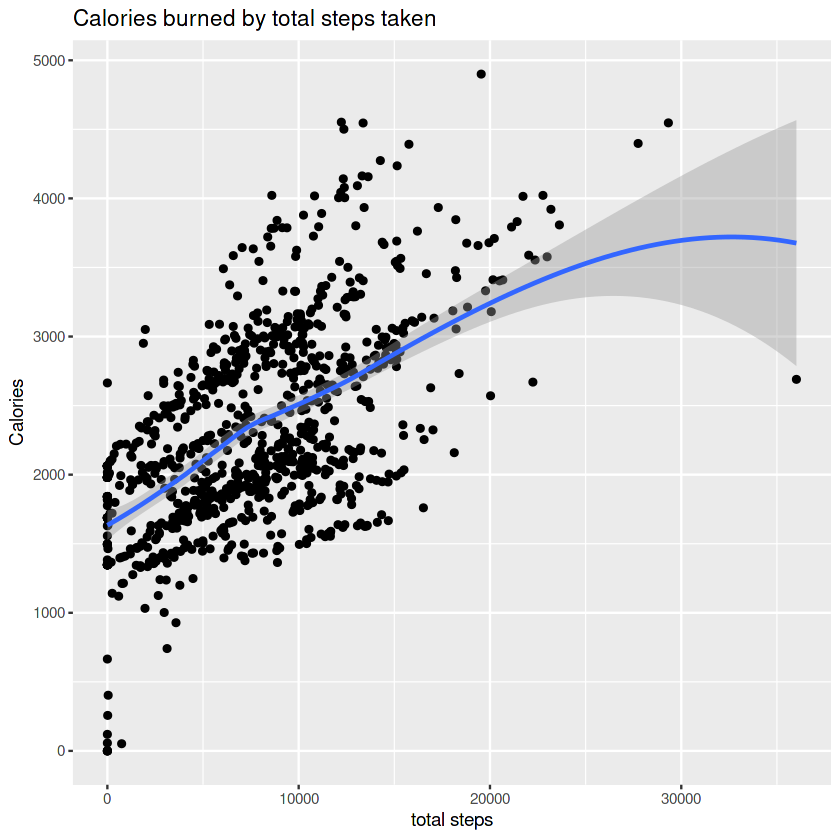

In [10]:
ggplot(data=daily_merged, aes(x=TotalSteps, y=Calories))+geom_point()+geom_smooth()+labs(title='Calories burned by total steps taken', x='total steps', y='Calories')

Based on this plot we can see that, there is an obvious correlation between the two variables which implies that the more steps you take the more calories you burn, which is fairly obvious.

### 4.2 Minutes asleep vs Sedentary time

In [11]:
# Because there are only 413 objects in sleep table and 940 objects in the merged table, we need to drop the empty fields.
daily_merged_cr <- daily_merged %>%
    select(TotalMinutesAsleep, SedentaryMinutes, TotalSteps) %>%
    drop_na()

str(daily_merged_cr)
head(daily_merged_cr)

'data.frame':	410 obs. of  3 variables:
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ SedentaryMinutes  : int  728 776 726 773 539 775 818 838 732 709 ...
 $ TotalSteps        : int  13162 10735 9762 12669 9705 15506 10544 9819 14371 10039 ...


,TotalMinutesAsleep,SedentaryMinutes,TotalSteps
,<int>,<int>,<int>
1,327,728,13162
2,384,776,10735
3,412,726,9762
4,340,773,12669
5,700,539,9705
6,304,775,15506


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



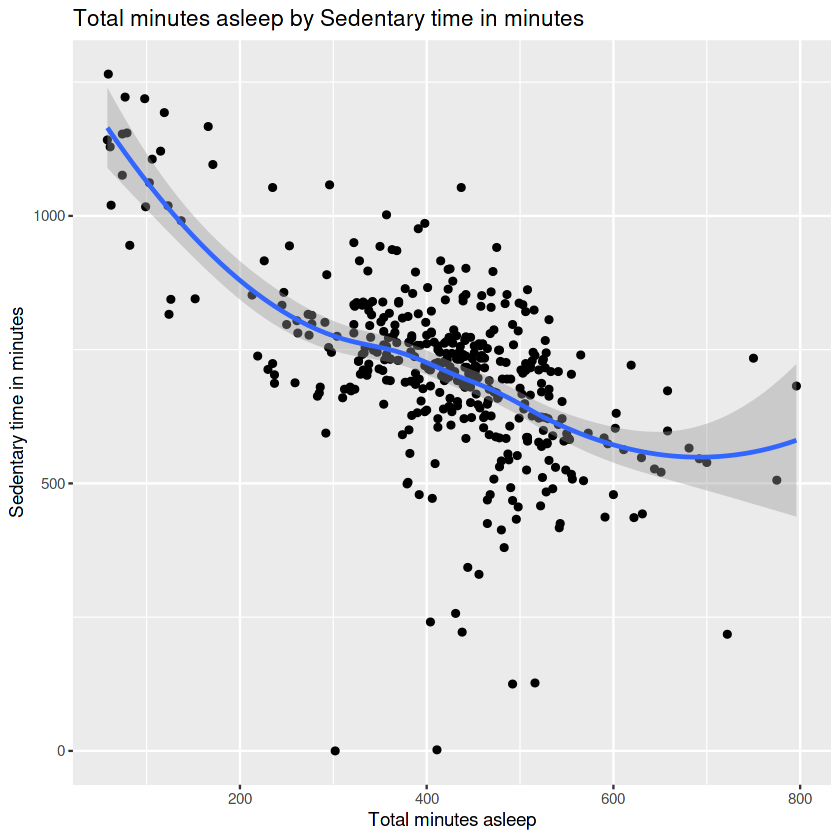

In [12]:
ggplot(data=daily_merged_cr, aes(x=TotalMinutesAsleep, y=SedentaryMinutes)) + geom_point() + geom_smooth() + labs(title="Total minutes asleep by Sedentary time in minutes", x ="Total minutes asleep", y="Sedentary time in minutes")

We can clearly see a negative correlation between sleep time and sedentary minutes.

## 4.3 Minutes Asleep by total steps taken

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



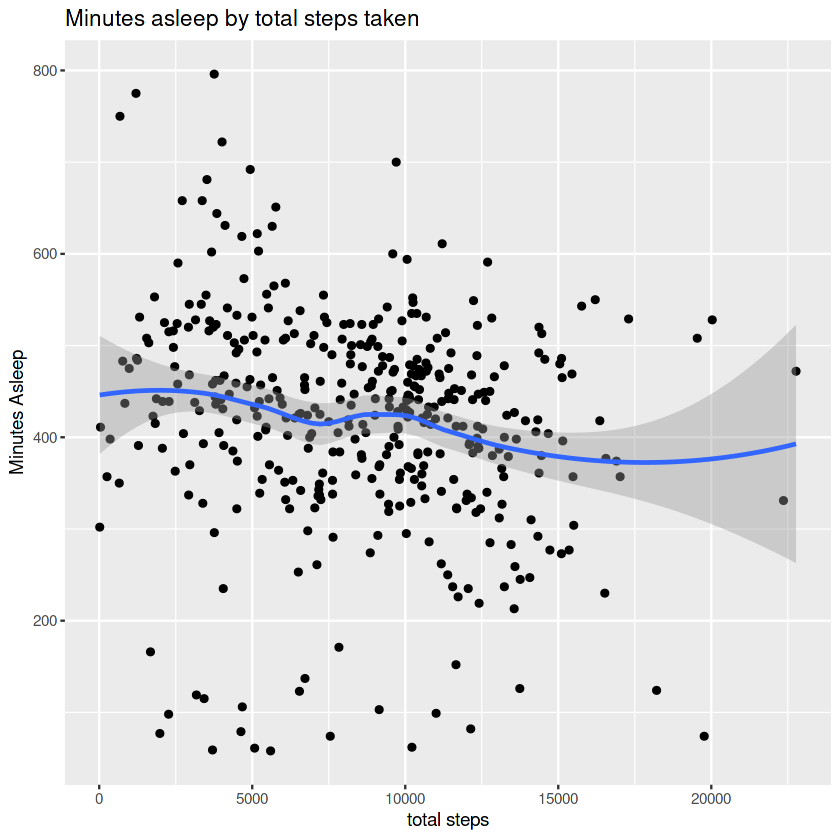

In [13]:
ggplot(data=daily_merged_cr, aes(x=TotalSteps, y=TotalMinutesAsleep))+geom_point()+geom_smooth()+labs(title='Minutes asleep by total steps taken', x='total steps', y='Minutes Asleep')

Based on this scatter plot, no correlation can be seen between the two variables.

## 4.4 Sleep distribuition

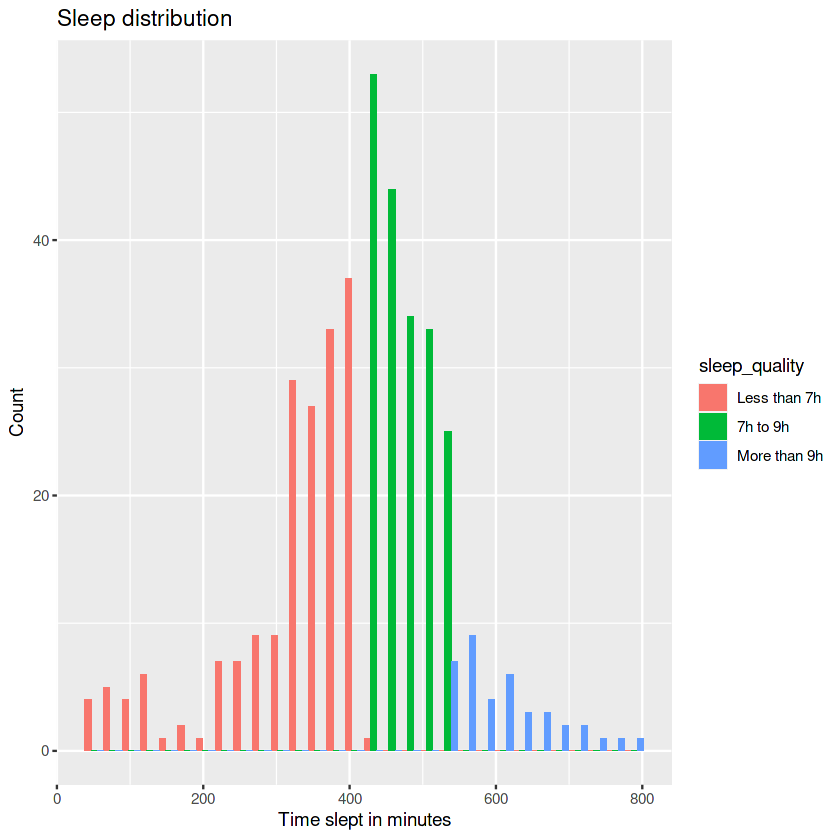

In [14]:
daily_merged %>% 
  select(TotalMinutesAsleep) %>% 
  drop_na() %>% 
  mutate(sleep_quality = ifelse(TotalMinutesAsleep <= 420, 'Less than 7h',
                         ifelse(TotalMinutesAsleep <= 540, '7h to 9h', 
                         'More than 9h'))) %>%
  mutate(sleep_quality = factor(sleep_quality, 
                          levels = c('Less than 7h','7h to 9h',
                                     'More than 9h'))) %>% 
  ggplot(aes(x = TotalMinutesAsleep, fill = sleep_quality)) +
  geom_histogram(position = 'dodge', bins = 30) +
  labs(
    title = "Sleep distribution",
    x = "Time slept in minutes",
    y = "Count"
  )

Based on this histograms, we see that almost half of the users are getting less than 7 hours of sleep a day which is not ideal.

# 5 Share
## Key take aways
* Average sedenary time is **991 minutes i.e., 16.5 hours.** Based on this [publication](http://https://bmcmedicine.biomedcentral.com/articles/10.1186/s12916-018-1062-2), it is found that more time spent in sedentary behaviors is associated with increased mortality risks. And fewer than 9 hours of sedentary time is optimal. Thus, having notifications on the smart products that notifies users when they have been sitting for too long could help.
* [Studies](http://https://www.webmd.com/sleep-disorders/sleep-requirements) have shown that adults typically requires 7 to 9 hours of sleep, and based on the data, we see that the average sleep is **419 minutes or about 7 hours,** which is right about but from the histogram it is clearly visible that about half of the users aren't getting enough sleep. 
* Also,based on the negative correlation shown between sedentary time and sleep, reducing sedentary times could lead users to have a better sleep.
* Most studies have shown that walking 10,000 steps a day or 150 minutes a week of moderate to high intensity exercises help reduces the risk of heart diseases, diabetes, high blood pressure, obesity, etc. From this dataset, the average steps per day is only 7638 so while most users are fairly active, Bellabeat could have notfications to remind users to do more physical activities. 
